# Classification

> ## ❓Questions
> - What metrics are used to for evaluation in a classification problem?
> - What dataset will we be working with today?
> - What exploratory data analysis do we need to carry out on
  datasets we plan to work with for classification?
> - How do we split our data into training and testing sets?
> - How can we use scikit-learn to classify data in python?
> - How can we find out which hyperparameters are best for classification?
    
> ## ☑︎ Objectives
> - Explain what a confusion matrix is, and how it relates to common
  classification error metrics
> - Understand how missing data can be hidden within normal-looking datasets
> - Use the scikit-learn library to work with data
> - Learn how to build and evaluate classifiers
> - Use the online documentation to figure out what the hyperparameters
  are for a specific method
> - Build classification models using KNN, naive bayes, regularised
  and boosted logistic regression, decision trees and a random forest

## What is a classifier?

A classifier is some kind of rule / black box / widget that you can feed a new observation/data/record and it will decide whether or not it is part of a given class. E.g. below, we are classifying the animals to be either *cat* or *not cat*.

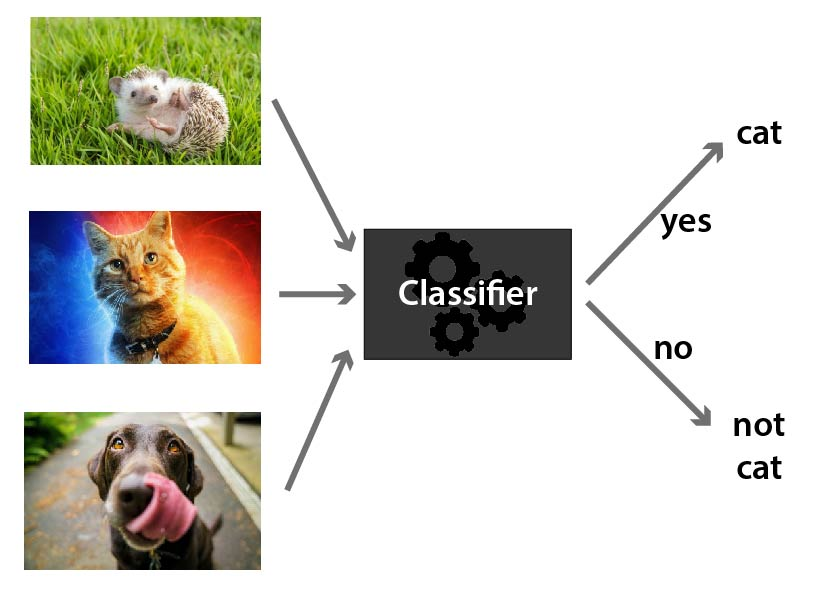


You can have classifiers for anything you can have a yes/no answer to, e.g.

- Is this a cat? 🐱
- Do these test results indicate cancer? 🚑
- Is this email spam or not spam? 📧

You can also have classifiers that categorise things into multiple (more than two) categories e.g.

- Which animal is this, out of the 12 animals I have trained my model on? 🐱
- Do these test results indicate {none, stage 1, stage 2, stage 3, stage 4} cancer? 🚑
- Is this email important, not important but not spam, or spam? 📧

It is clear that in some of these examples we are more concerned with being wrong in one direction than the other, e.g. it's better to let some spam email through accidentally than to block all of it but also junk important emails from people you know. Likewise, we would prefer our medical tests to err on the side of caution and not give a negative test result to someone who needs treatment. So we will need to adjust a parameter to decide how much we want to trade this off.

## Model evaluation (classification)

For now, let's imagine we have a classifier already. How can we test it to see how good it is?
A good start is a confusion matrix - a table of what test data it labels correctly and incorrectly.

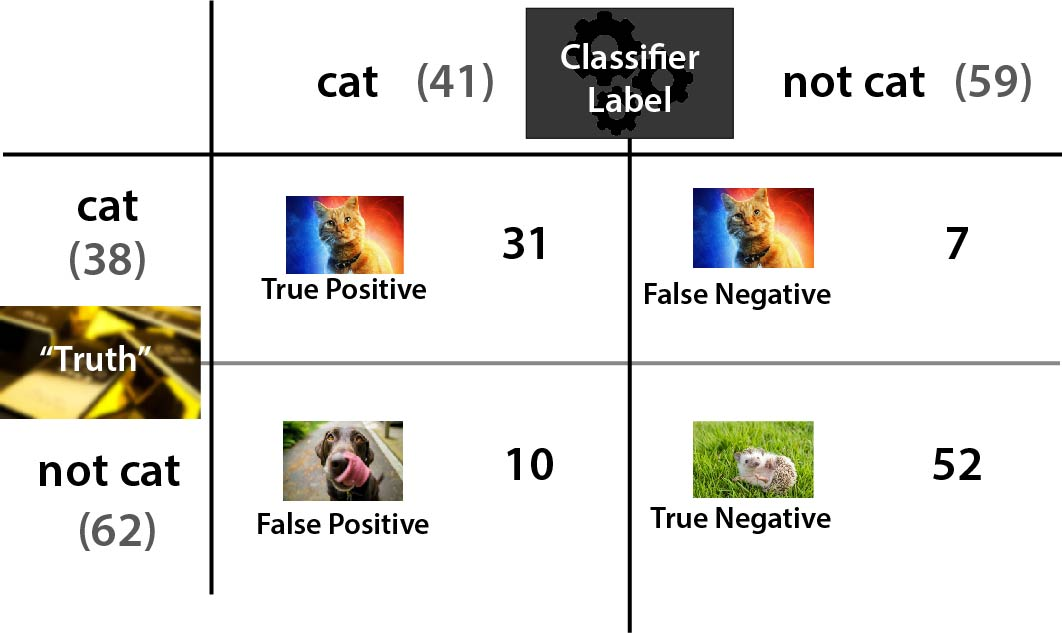

### Confusion Matrix

When applying classification models, we often use a confusion matrix to evaluate certain performance measures. A confusion matrix is simply a matrix that compares "the truth" to the labels generated by your classifier. When we label a cat correctly, we refer to this as a true positive. When we fail to label a cat as a cat, this is called a false negative.  However, if we label something which is not a cat as a cat, this is called a false positive; and of course if we correctly label something which is not a cat, as not a cat, then this is a true negative.

### Some common metrics

#### Accuracy:

How often does the classifier label examples correctly? We want to maximize this. Example:

$$
\text{Accuracy} = \frac{\text{TP + TN}}{\text{TP + FP + FN + TN}} \\
= \frac{\text{Correctly labelled examples}}{\text{All examples}} = \frac{31 + 52}{31 + 52 + 10 + 7} = 83\%
$$

Accuracy is the opposite of the misclassification rate. So,

$$
\text{Misclassification rate} = 1 - \text{Accuracy} = \frac{\text{Incorrectly labelled examples}}{\text{All examples}}
$$

#### Precision:

What fraction of things labelled as a cat were actually cats? We want to maximize this. Example:


$$
\frac{\text{TP}}{\text{TP + FP}} = \frac{\text{Correctly labelled cats}}{\text{All things labelled as cats}} =
\frac{31}{31 + 10} = 76\%
$$


#### Sensitivity/Recall:

How often does the classifier label a cat as a cat. We want to maximize this. Example:

$$
\frac{\text{TP}}{\text{TP + FN}} = \frac{\text{Correctly labelled cats}}{\text{All true cats}} = \frac{31}{31 + 7} = 81\%
$$

#### Specificity:

How often does it label a not-cat as a not-cat. We want to maximize this. Example:

$$\frac{\text{TN}}{\text{TN + FP}} = \frac{\text{Correctly labelled not-cats}}{\text{All true not-cats}} = \frac{52}{52 + 10} = 84\%$$

#### F1-score:

This is a commonly used overall measure of classifier performance, but it's not always the best depending on the problem. It's defined as the harmonic mean of precision and sensitivity

$$ \text{F1} = \frac{2 \cdot \text{TP}}{2 \cdot \text{TP} + \text{FP} + \text{FN}} = 82\% $$

#### Mean-squared error (MSE):

If you define a loss/error function so that $L_i = 1$ if the *i*th example is classified incorrectly and $L_i = 0$ if it's classified correctly, then if the there are $N$ examples the mean-squared error is:

$$ MSE = \frac{1}{N} \sum_i L_i = \frac{\text{Incorrectly labelled examples}}{\text{All examples}}$$

Which works out to the misclassification rate above.

#### AUC: Area under the curve

A good classifier will have high precision and high specificity, minimizing both false positives and false negatives. In practice, and with an imperfect classifier, you can tune a knob to say which of those two you care more about. There will be some kind of a trade-off between the two.

To capture this balance, we often use a Receiver Operator Characteristic (ROC) curve that plots the false positive rate along the x-axis and the true positive rate along the y-axis, for all possible trade-offs. A line that is diagonal from the lower left corner to the upper right corner represents a random guess at labelling each example. The higher the line is in the upper left-hand corner, the better the classifier in general. AUC computes the area under this curve. For a perfect classifier, AUC = 1, for a random guess, AUC=0.5. Objective: maximize.

![A Receiver Operator Characteristic (ROC) curve, from which the Area Under the Curve (AUC) can be calculated.]( 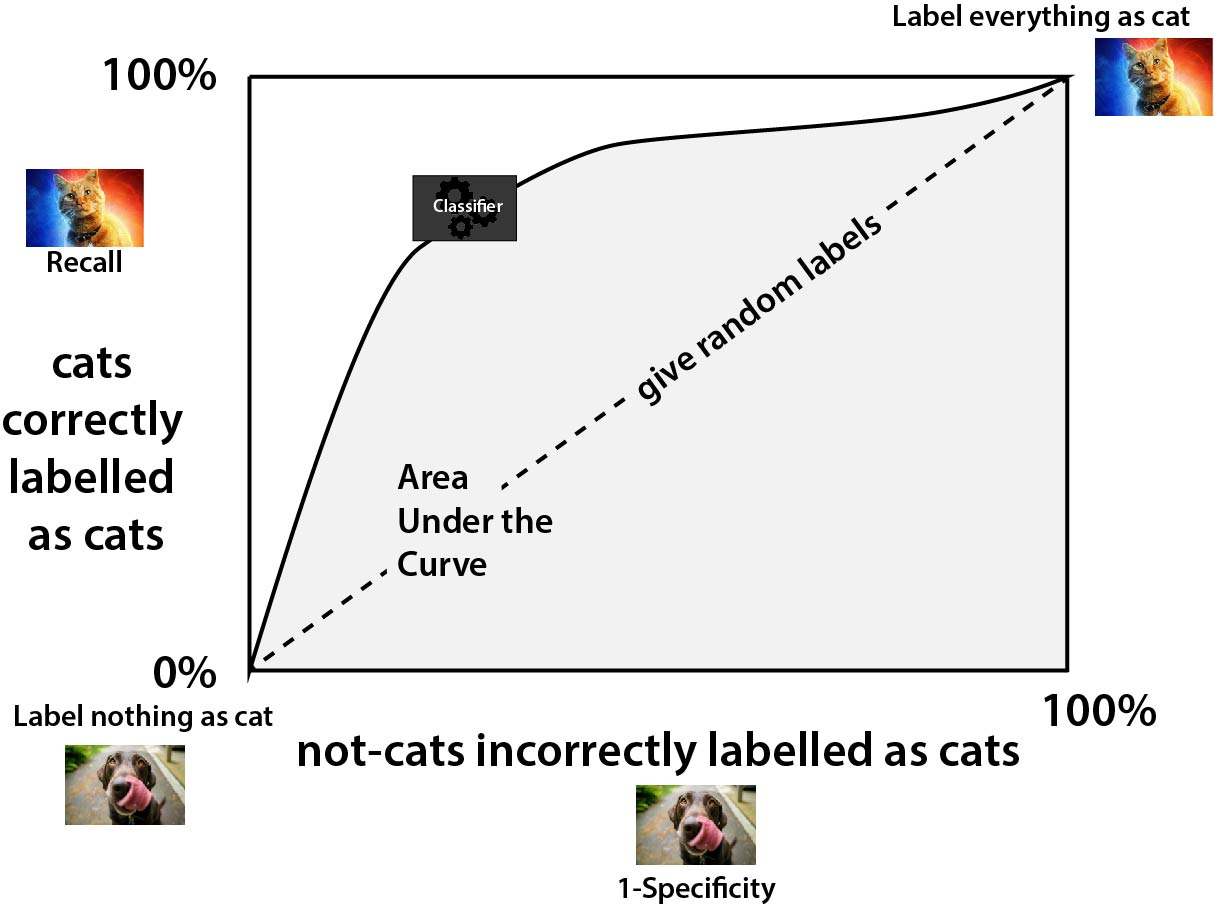)

## Pima Indians Diabetes
Today, we are going to be working with the [Pima Indians Diabetes Dataset](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database). This is a classic dataset from the UCI machine learning repository, which is now hosted on kaggle. We have downloaded the .csv file of this dataset from kaggle. It contains the following variables:



1. Pregnancies --- Number of times pregnant
2. Glucose --- Plasma glucose concentration at 2 hours in an [oral glucose tolerance test](https://en.wikipedia.org/wiki/Glucose_tolerance_test)
3. BloodPressure --- Diastolic blood pressure (mm Hg)
4. SkinThickness --- Triceps skin fold thickness (mm) - [a measure correlated with body fat](https://en.wikipedia.org/wiki/Anthropometry_of_the_upper_arm)
5. Insulin --- 2-Hour serum insulin (μU/ml)
6. BMI --- Body mass index (weight in kg/(height in m)$^2$)
7. DiabetesPedigreeFunction --- Diabetes pedigree function, explained below
8. Age --- Age (years)
9. Outcome --- diabetes status (1 - diabetic; 0 - non-diabetic)


The diabetes pedigree function was developed by [Smith 1988](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2245318/) to provide a synthesis of the diabetes mellitus history in relatives and the genetic relationship of those relatives to the subject. It uses information from parents, grandparents, siblings, aunts and uncles, and first cousin to provide a measure of the expected genetic influence of affected and unaffected relatives on the subject’s eventual diabetes risk:

$$
DPF = \frac{ \sum_i K_i (88 - ADM_i) + 20}{ \sum_j K_j (ALC_j - 14) + 50}
$$


- $i$ --- ranges across all relatives who HAD developed diabetes by subject's examination date
- $j$ --- ranges across all relatives who HAD NOT developed diabetes by subject's examination date
- $K_x$ --- percentage of genes shared by relative and subject. Equal to:
      - 0.5 when relative is parent or full sibling
      - 0.25 when relative is half-sibling, grandparent, aunt or uncle
      - 0.125 when relative is half aunt, half uncle or first cousin
- $ADM_i$ --- age when diabetes was diagnosed
- $ALC_j$ --- age of relative when last "non-diabetic" assessment was made
- 88 and 14 --- constants --- maximum and minimum age at which patients in study were diagnosed with diabetes
- Constants 20 and 50 chosen so that:
      - A subject with no relatives has DPF slighly lower than average
      - DPF value decreases as young relatives free of diabetes join the database
      - DPF increases quickly as known relatives develop diabetes
  
DPF increases as:

- the number of relatives with diabetes increases
- the age at which those relatives develop diabetes decreases
- percentage of genes these relatives share with subject increase

DPF decreases as:

- the number of relatives who never develop diabetes increases
- their ages at last examination increase
- percentage of genes these relatives share with subject increase


## Let's Explore our data

In [ ]:
import warnings
warnings.simplefilter('ignore', category=UserWarning)
warnings.simplefilter('ignore', category=FutureWarning)

import numpy as np
import pandas as pd

import statsmodels.api as sm

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    roc_curve, auc, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.utils.multiclass import unique_labels
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
sns.set(font_scale = 1.5)

### Load Data

In [ ]:
diabetes = pd.read_csv('https://github.com/Sydney-Informatics-Hub/lessons-mlpy-flipped/raw/main/data/diabetes.csv') # read csv

Explore the variables:

1. List the columns in our dataframe using `DataFrame.columns`


In [ ]:
# Fill in the blanks
diabetes.___

2. Get information about column types and values using `Dataframe.info`


In [ ]:
diabetes.___()

### Summary info
Shape of data frame using `DataFrame.shape`

In [ ]:
diabetes.___

Look for missing data by counting the number of non-null data (`DataFrame.count`):

In [ ]:
diabetes.___()

It seems like there is no missing data.
Get a summary of the data frame (use `DataFrame.describe`):

In [ ]:
diabetes.describe()

> ### ⚠️ Challenge: Missing data
>
> Look at the output of summary above and the table that
> explains what each of the variables are. Do the values for all
>    
> * Pregnancies and Glucose
> * BloodPressure and SkinThickness
> * Insulin and DiabetesPedigreeFunction, and
> * BMI and Age  
>
> make sense?
>
> If not, how do you think we should deal with them?
> Can you hypothesise what the consequences of this approach would be?



In [ ]:
# Use this cell to explore the data in your dataframe

### Let’s use visualisation to further explore the dataset:

Plot counts of variables as a function of 'Outcome' as a bar plot.

In [ ]:
# Try plotting outcome against other variables, e.g. "Pregnancies"
sns.countplot(
    x=...,
    hue="Outcome",
    data=diabetes
);

In [ ]:
diabetes['Outcome'].value_counts()

Plot all possible scatterplot pairs (use numeric variables only with `df.select_dtypes`):

In [ ]:
# Only select numeric columns
num_vars = diabetes.___(include = ['number']).columns
# Plot the selected numeric types
sns.pairplot(
    data=diabetes,
    vars=...,
    hue='Outcome',
    palette={0:'k',1:'r'},
    # use kernel density estimates for univariate plots
    diag_kind='kde',
    # make the shape of points circular and diamond, respectively
    markers=["o", "d"]
);

Generate a boxplot by possible prediction variables. Which do you hypothesize would be easiest for us to use to separate the data?

In [ ]:
# copy the original dataframe
diabetes2 = diabetes.copy()
# create a new patient id column
diabetes2['PatientID'] = range(1, len(diabetes2) + 1)
# melt that dataframe to make it "long"
diabetes2 = diabetes2.melt(id_vars=['PatientID','Outcome'])

In [ ]:
# Plot only the first 4
grid = sns.axisgrid.FacetGrid(
    diabetes2[diabetes2["variable"].isin(num_vars[4:])],
    col='variable',
    # y axis scale different for each boxplot
    sharey=False
)
grid.map(sns.boxplot, 'Outcome','value', order=[0, 1]);

Make a correlation plot between all numeric variables - correlation plots like this can be easier to read if you only plot one half (they're symmetrical around the diagonal, so you don't lose any information by doing this)

In [ ]:
corr = diabetes.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale = 1.2)

# Only plot the unmasked data
with sns.axes_style("white"):
    sns.heatmap(
        data=corr,
        # Provide the mask here to block out the upper triangle
        mask=...,
        vmin=-1, vmax=1,
        cmap="BrBG",
        square=True, linewidths=.5
    )

## Prepare Data

Let’s replace the missing values in the diabetes data frame (currently coded with 0) with `np.nan`, to explicitly code them as missing:

> ## ℹ️ Missing values in Pandas
> Pandas has introduced a special missing value, `pd.NA`,
> to represent missing values. Using `np.nan` ("not a number")
> is not ideal as it doesn't always reflect missing data (it could be
> the result of a calculation gone wrong).
>
> Unfortunately, 3rd party packages like scikit-learn aren't
> totally compatible with it yet, so we're best off using
> `np.nan`

In [ ]:
# get the column names
diabetes.columns

Which columns do you think need to have their values replaced? We looked at these above

In [ ]:
replaceVars = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [ ]:
# mark zero values as missing or NaN with np.nan
diabetes[replaceVars] = diabetes[replaceVars].replace(0, ...)
diabetes.isna().sum()

Let’s generate a new correlation plot where the missing data has been properly recoded as NaN. Which correlations change?

In [ ]:
corr = diabetes.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale = 1.2)

with sns.axes_style("white"):
    sns.heatmap(
        data=corr,
        mask=mask,
        vmin=-1, vmax=1,
        cmap="BrBG",
        square=True, linewidths=.5
    )

***
## Aim

To create a classifier for predicting whether a person has diabetes or not.

## Train-Test split

We’re going to split our data into 70% training and 30% testing sets.

In [ ]:
features_train, features_test, outcome_train, outcome_test = train_test_split(
    diabetes[diabetes.columns.difference(['Outcome'])],
    diabetes['Outcome'],
    train_size=...,
    random_state = 42,
    stratify = diabetes['Outcome']
)

How many examples do we have in the training and testing sets? (Check the `shape` of the data)



In [ ]:
features_train.___

In [ ]:
features_test.___

## Impute missing values using median values

We'll do this separately here to demonstrate it, but in our actual modelling, we can do this as part of a `scikit-learn` [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#pipeline) - so we'll just provide our unimputed data (`features_train`) to the models.

In [ ]:
## Impute missing information wsing 'median' strategy
imp_median = SimpleImputer(strategy=...)
imp_median.fit(features_train)
features_train_imp = pd.DataFrame(imp_median.transform(features_train))
features_test_imp = pd.DataFrame(imp_median.transform(features_test))
features_train_imp.columns = features_train.columns
features_test_imp.columns = features_test.columns

Confirm that we have imputed the values for both training and testing datasets using the **training** data median!

In [ ]:
features_train.head()

In [ ]:
features_train_imp.head()

In [ ]:
features_test.tail()

In [ ]:
features_test_imp.tail()

In [ ]:
features_train.median()

In [ ]:
features_test.median()

### Check outcome

In [ ]:
# 0 is normal
# 1 is diabetes
print('count of outcome in test set')
print((outcome_test == 0).sum())
print((outcome_test != 0).sum())

#
print('count of outcome in train set')
print((outcome_train == 0).sum())
print((outcome_train != 0).sum())

# is our train/test balanced?
print('Check the proportions in the test and training sets')
print((outcome_test != 0).sum() / (outcome_test == 0).sum())
print((outcome_train != 0).sum() / (outcome_train == 0).sum())

## Classifiers

### k-Nearest Neighbours Classifier

This takes the nearest $k$ data points and looks at which outcome is most common in them. In the example below we look at the seven nearest neighbours, 4 of which are cats so we say that the new example is probably a cat as well.

![A way to classify a new example as a cat or not...take the average of the nearest k=7 examples. It's a cat!](https://github.com/Sydney-Informatics-Hub/lessons-mlpy-flipped/blob/main/course/fig/50-CatKNN.jpg?raw=1)


#### Let's Classify!

Below we'll train a KNN classifier, tuning across different numbers of neighbours.

How you define the distance between samples can matter a lot for KNN models,
but in our case using Euclidean distance should be fine. You can read
about the [different distance metrics here](https://www.kdnuggets.com/2023/03/distance-metrics-euclidean-manhattan-minkowski-oh.html)

In [ ]:
# the default settings are metric='minkowski' and p = 2
# , which is the same as the standard Euclidean metric
# p = 1 gets us manhattan distance

cf_knn = Pipeline([
    ("impute", SimpleImputer(strategy='median')),
    ("scaler", StandardScaler()),
    ("model", GridSearchCV(
        KNeighborsClassifier(metric="minkowski", p=2),
        # We want to tune the "n_neighbors" parameter
        param_grid={_____: np.arange(1, 51)},
        # use 5xfold cross-validation
        cv=5,
        # use f1 as error metric
        scoring = 'f1',
        return_train_score=True
    ))
])


fit_knn = cf_knn.fit(features_train, outcome_train)

Explore the [documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) for other error metrics we could have used.

In [ ]:
# Look at the cross-validation results
knn_results = pd.DataFrame.from_dict(fit_knn["model"].cv_results_)
knn_results.head()

Extract the model from the pipeline (we can use any name we want for this step, in the previous session we used "estimator" but "model" also works):

In [ ]:
# Access the "model" step
fit_knn[...].best_estimator_.n_neighbors

We'll plot the out-of-sample score across different values of the parameter to see how it changes, and where the best values of the parameter appear to be:

In [ ]:
sns.lineplot(data=knn_results, x="param_n_neighbors", y="mean_test_score", markers=True)
best_n = fit_knn["model"].best_estimator_.n_neighbors
plt.errorbar(
    data=knn_results,
    x="param_n_neighbors",
    y="mean_test_score",
    yerr="std_test_score"
)
plt.scatter(
    x = best_n,
    y = knn_results["mean_test_score"].loc[knn_results["param_n_neighbors"] == best_n],
    color = 'r',
    # plots point on top of other plot
    zorder = 10
);

> ## ⚠️ Challenge
> Do you think this is the optimal solution? Would it be worth training across a wider range for the `n_neighbors` parameter?

For assessing the model performance, we need to access both the predicted **classes** from the model (diabetes/no diabetes), and the predicted **probabilities** (probability of having diabetes).

The scikit-learn API makes both readily available, but for the probabilities, we do an extra processing step as we're only interested in the probability of having diabetes.

In [ ]:
# Use trained classifier to predict outcome for training and test
knn_outcome_pred_class_train = fit_knn.predict(features_train)
# Predict on the test dataset
knn_outcome_pred_class_test = fit_knn.predict(...)


# get probabilities out: sklearn gives us the probability of having diabetes, and not 
# having diabetes. This is a bit redundant when we only have two classes, but is
# useful for multi-class probe
def model_probabilities(model, dataset):
    return model.predict_proba(dataset)[:, 1]

knn_outcome_pred_prob_train = model_probabilities(model = fit_knn, dataset = features_train)
knn_outcome_pred_prob_test = model_probabilities(model = fit_knn, dataset = features_test)

#### Classifier Diagnostics/evaluation
So how well did the classifier do? Let's define a function to generate a confusion matrix:

In [ ]:
# define custom confusion matrix function
def confmatrix(truth = outcome_train,
               prediction = knn_outcome_pred_class_train):
    df = pd.DataFrame(confusion_matrix(truth, prediction))
    #Total sum per row:
    df.loc['Total',:]= df.sum(axis=0)
    # assign multi index label on the left of rows
    df.index = pd.MultiIndex.from_tuples([('Truth', 0), ('Truth', 1), ('Total', '')])
    #Total sum per column:
    df.loc[:,'Total'] = df.sum(axis=1)
    # assign multi index label at the top of the column names
    df.columns = pd.MultiIndex.from_tuples([('Prediction', 0), ('Prediction', 1), ('Total', '')])
    return(df)

Then we'll look at our performance on the training and test sets:

In [ ]:
confmatrix(truth = outcome_train, prediction = knn_outcome_pred_class_train)

In [ ]:
confmatrix(truth = outcome_test, prediction = knn_outcome_pred_class_test)

In [ ]:
# define a function to plot an ROC curve
def plot_ROC(truth = outcome_train, prediction1 = knn_outcome_pred_prob_train,
             col = 'b', test=False):
    fpr, tpr, _ = roc_curve(truth, prediction1)
    AUC = roc_auc_score(truth, prediction1)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1], 'k--')
    label_plot = f'Train set, AUC = {AUC:.2f}'
    if test:
        label_plot = f'Test set, AUC = {AUC:.2f}'
    plt.plot(fpr, tpr, label=label_plot, color = col)
    plt.legend(loc="lower right");

We'll plot the **ROC curve** to get an overview of how the model performed in the training vs. the test sets. Remember that a better-performing model will have an ROC curve that is very close the the top-left corner (high true positive rate with a low false positive rate):

In [ ]:
# plot the roc curves
# training in blue: provide the predicted probabilities here:
plot_ROC(truth = outcome_train, prediction1 = ..., col = 'b')
# test in red
plot_ROC(truth = outcome_test, prediction1 = knn_outcome_pred_prob_test, col = 'r', test=True)

> ## ⚠️ Challenge
> How well do you think this model generalized to new data?

### Regularized Logistic Classifier

Just like with linear regression for continuous outcomes, we can use regularization to reduce the size of coefficients in a logistic regression model. We can use the **ElasticNet** model that penalizes both the absolute size of the coefficients (L1 regularization) and the size of the squared coefficients (L2 regularization), tuning the ratio between them.

#### Let's Classify!

In scikit-learn, the default [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model includes regularisation. Check the documentation for the different parameters available. The penalty term `C` is expressed differently here - higher values mean *less* regularization.

In [ ]:
from sklearn.linear_model import LogisticRegression

rlc_dict = {
    'penalty': ['elasticnet'],
    'class_weight': [None, 'balanced'],
    # Tune the 'l1_ratio' between 0 (ridge) and 1 (lasso) regularization
    ...: np.linspace(0, 1, num=11),
    'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 100, 1000]
}

cf_rlc = Pipeline([
    ("impute", SimpleImputer(strategy='median')),
    ("scaler", StandardScaler()),
    ("model", GridSearchCV(
        # Only the 'saga' solver implements ElasticNet
        LogisticRegression(random_state=42, solver='saga',
                                multi_class='ovr'),
        rlc_dict,
        # use 5xfold cross-validation
        cv=5,
        # use AUC as error metric
        scoring = 'f1'
    ))
])

# fit model on training data
fit_rlc = cf_rlc.fit(features_train, outcome_train)

In [ ]:
# what is the best estimator?
fit_rlc["model"].best_estimator_

Use trained classifier to predict outcome for training and test sets

In [ ]:
rlc_train_pred_class = fit_rlc.predict(features_train)
rlc_test_pred_class = fit_rlc.predict(features_test)

rlc_pred_prob_train = model_probabilities(model = cf_rlc, dataset=features_train)
rlc_pred_prob_test = model_probabilities(model = cf_rlc, dataset=features_test)

#### Classifier evaluation
So how well did the classifier do?

In [ ]:
# print matrix for predictions on training and testing
print("Training set")
confmatrix(truth = outcome_train, prediction = rlc_train_pred_class)

In [ ]:
print("\nTesting set")
confmatrix(truth = outcome_test, prediction = rlc_test_pred_class)

In [ ]:
# plot the roc curves
plot_ROC(truth = outcome_train, prediction1 = rlc_pred_prob_train, col = 'b')
plot_ROC(truth = outcome_test, prediction1 = rlc_pred_prob_test, col = 'r', test=True)

### Decision Trees

A decision tree 🌳 picks the best split in the data greedily for each feature and basically makes a flowchart to follow with a new data point to say what you should classify it as. This makes them easy to understand, but also usually not very accurate.

#### Let's Classify!

You can find the documentation for decision tree models [here](https://scikit-learn.org/stable/modules/tree.html). One of the most important aspects to tune in a decision tree model is the **maximum depth** of the tree - as trees split the training features into increasingly smaller subsets, they tend to overfit. 

However, as you'll see below, we don't necessarily need to tune this directly - tuning the **minimum number of samples** required for a split achieves the same thing. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc_dict = {
    # function to measure quality of split
    'criterion': ['gini', 'entropy'],
    # The minimum number of samples required to split an internal node
    'min_samples_split': np.arange(start = 2, stop = 20, step = 3),
    # The minimum number of samples required to be at a leaf node
    'min_samples_leaf': np.arange(start = 1, stop = 10, step = 2)}


cf_dtc = Pipeline([
    ("impute", SimpleImputer(strategy='median')),
    ("scaler", StandardScaler()),
    ("model", GridSearchCV(
        DecisionTreeClassifier(random_state= 42),
        dtc_dict,
        # use 5xfold cross-validation
        cv=5,
        # use AUC as error metric
        scoring = 'f1'
    ))
])

# fit the model on the training data
fit_dtc = cf_dtc.fit(features_train, outcome_train)

# what were the best parameters?
fit_dtc["model"].best_estimator_

How deep a tree did we end up with? We can check the depth of the final model fitted to the training data with `model.get_depth()`. To access the actual fitted tree we need to access the `best_estimator_` from the grid search:

In [ ]:
fit_dtc["model"].best_estimator_.____()

> ## ⚠️ Optional challenge: decision tree depth
> Do we get the same performance (and tree depth) if we directly tune
> the maximum depth, instead of the minimum samples in a split?
> Why might we choose to tune using depth vs. number of samples?

Use trained classifier to predict outcome for test-set

In [ ]:
dtc_train_pred_class = fit_dtc.predict(features_train)
dtc_test_pred_class = fit_dtc.predict(features_test)

dtc_pred_prob_train = model_probabilities(model = cf_dtc, dataset=features_train)
dtc_pred_prob_test = model_probabilities(model = cf_dtc, dataset=features_test)


# # print matrix for predictions on training and testing
print("Training set")
print(confmatrix(truth = outcome_train, prediction = dtc_train_pred_class))
print("\nTesting set")
print(confmatrix(truth = outcome_test, prediction = dtc_test_pred_class))



# # plot the roc curves
plot_ROC(truth = outcome_train, prediction1 = dtc_pred_prob_train, col = 'b')
plot_ROC(truth = outcome_test, prediction1 = dtc_pred_prob_test, col = 'r', test=True)

As mentioned above, an advantage of decision trees is that they are **interpretable**: you can understand exactly how they are making their predictions. You can visualize the tree to see what predictor values were used to make each split, and how many samples were in each branch:

In [ ]:
from sklearn import tree

tree.plot_tree(fit_dtc["model"].best_estimator_, max_depth=2,
               feature_names=features_train.columns,
               label='root',
               filled=True);

> ## ⚠️ Challenge
> Do you think this model has good performance? Has it generalized well to new data?

### Random Forest Classifier
A random decision tree is where you make a decision tree but only train it on either:

- (a) a random sample of the available data or
- (b) a random sample of the available features or
- (c) both.

A random forest is made up of multiple random decision trees, averaged together.

These models often perform well, and are used in a variety  of contexts. But because they're the average of so many different models it's hard to get an understanding about it. It's basically a black box that predicts well.

One of the important parameters to tune with a random forest is the **number of trees** that are fit (or "estimators") - more trees can capture more aspects of the data, but may become increasingly slow and impractical to fit.

**Note:** in the tuning below, we only explore a limited number of parameter values, for the sake of time. Ideally, we would tune over larger ranges, particularly for `n_estimators`, the number of trees fit.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
cf_rfc = RandomForestClassifier(random_state=42)

rf_dict = {
    # Tune the number of trees with 'n_estimators':
    ...: [50, 100, 150],
    # quality of a split
    'criterion': ['entropy'],
    # The minimum number of samples required to split an internal node
    'min_samples_split': [5, 10, 15],
    # The minimum number of samples required to be at a leaf node
    'min_samples_leaf': np.arange(start = 1, stop = 3, step = 1),
    # the number of features to consider when looking for the best split
    # max_features=sqrt(n_features)/max_features=log2(n_features)
    'max_features': ['sqrt', "log2"],
    'class_weight': ['balanced_subsample']
}


cf_rf = Pipeline([
    ("impute", SimpleImputer(strategy='median')),
    ("scaler", StandardScaler()),
    ("model", GridSearchCV(
        RandomForestClassifier(random_state=42),
        rf_dict,
        # use 5xfold cross-validation
        cv=5,
        # use AUC as error metric
        scoring = 'f1'
    ))
])


# fit model on training data
fit_rf = cf_rf.fit(features_train, outcome_train)

# what were the best parameters?
fit_rf["model"].best_estimator_

Use trained classifier to predict outcome for test-set

In [ ]:
rf_train_pred_class = cf_rf.predict(features_train)
rf_test_pred_class = cf_rf.predict(features_test)

rf_pred_prob_train = model_probabilities(model = cf_rf, dataset=features_train)
rf_pred_prob_test = model_probabilities(model = cf_rf, dataset=features_test)


# print matrix for predictions on training and testing
print("Training set")
print(confmatrix(truth = outcome_train, prediction = rf_train_pred_class))
print("\nTesting set")
print(confmatrix(truth = outcome_test, prediction = rf_test_pred_class))


# plot the roc curves
plot_ROC(truth = outcome_train, prediction1 = rf_pred_prob_train, col = 'b')
plot_ROC(truth = outcome_test, prediction1 = rf_pred_prob_test, col = 'r', test=True);

Note that you can access the **individual trees** from a random forest and interpret them or visualize them in the same way you do an individual decision tree. But understanding how this plays out across hundreds or thousands of trees means that it's hard to interpret the overall model:

In [ ]:
one_rf_tree = fit_rf["model"].best_estimator_.estimators_[0]

tree.plot_tree(one_rf_tree, max_depth=2,
               feature_names=features_train.columns,
               label='root',
               filled=True);

### Support Vector Machine
A support vector machine tries to find the data points right on the boundary between the two classes (the "support vectors") and then uses them to define a maximum margin boundary.

![A linear Support Vector Machine for Cats]( 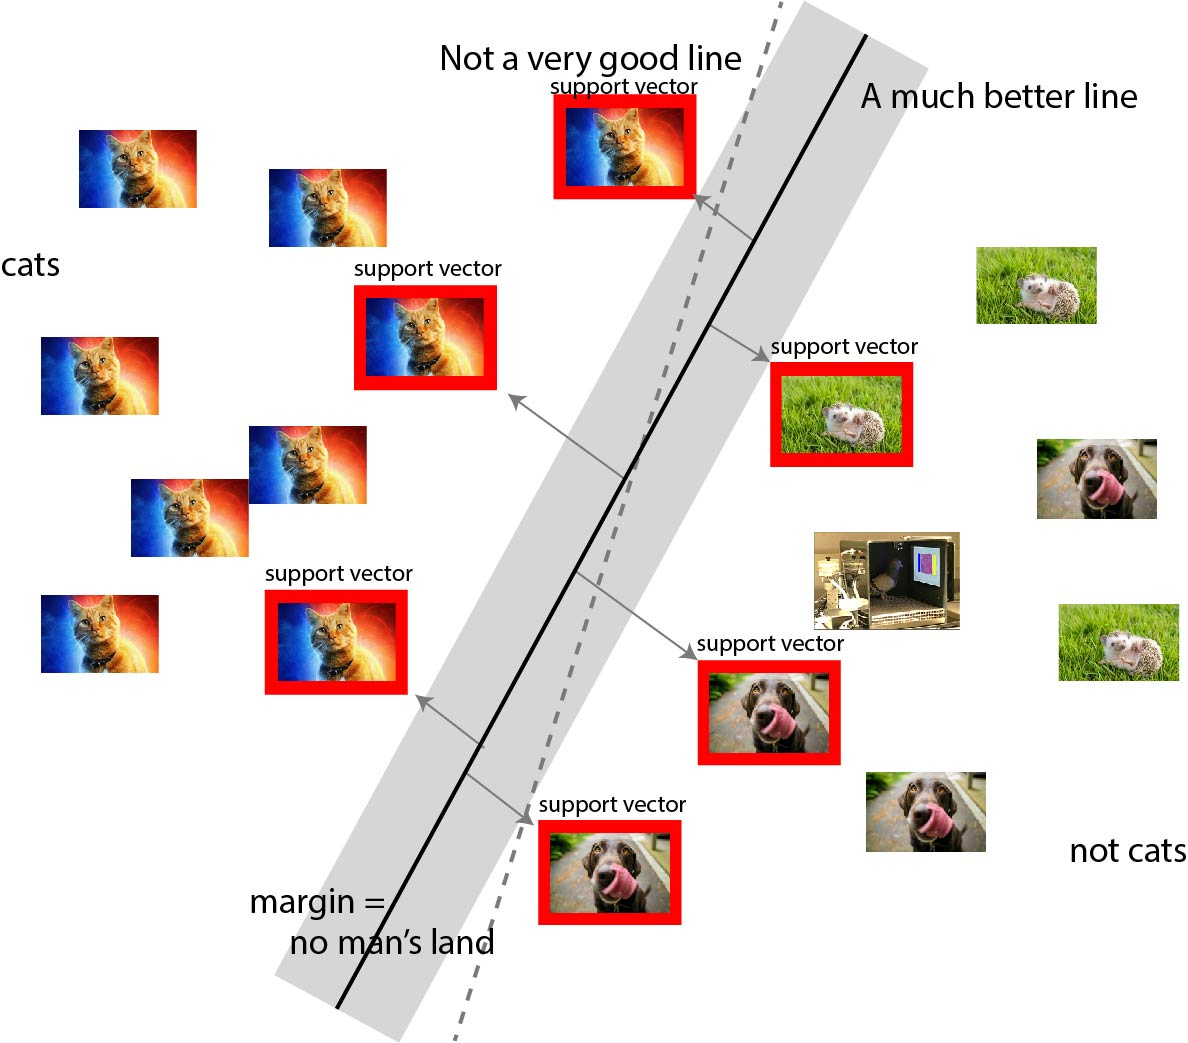)

#### Let's Classify!

For the sake of time in the workshop, we have not tried to fit a full grid of parameters for these model, we just include them here to show how to use them. 

> ## ⚠️ Challenge
>
> Can you construct your own tuning grid for a SVM model?
> Review the documentation for the model [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) to see the different options we could potentially tune over.
>
> While there are many options we could potentially tune, the most important ones are probably
> `C` (the regularization parameter) and `gamma` (for some kernels). We could also
> choose between different kernel functions within the tuning grid

In [ ]:
from sklearn import svm
cf_svm = svm.SVC(random_state=42, probability=True,
                 # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
                 # 1 / (n_features * X.var())
                gamma = 'scale')

cf_svm_lin = Pipeline([
    ("impute", SimpleImputer(strategy='median')),
    ("scaler", StandardScaler()),
    ("model", GridSearchCV(
        svm.SVC(random_state=42, probability=True, gamma = 'scale'),
        {'kernel': ['linear']},
        # use 5xfold cross-validation
        cv=5,
        # use AUC as error metric
        scoring = 'f1'
    ))
])


fit_svm_lin = cf_svm_lin.fit(features_train, outcome_train)

cf_svm_rad = Pipeline([
    ("impute", SimpleImputer(strategy='median')),
    ("scaler", StandardScaler()),
    ("model", GridSearchCV(
        svm.SVC(random_state=42, probability=True, gamma = 'scale'),
        {'kernel': ['rbf']},
        # use 5xfold cross-validation
        cv=5,
        # use AUC as error metric
        scoring = 'f1'
    ))
])


fit_svm_rad = cf_svm_rad.fit(features_train, outcome_train)

In [ ]:
fit_svm_lin["model"].best_estimator_

In [ ]:
fit_svm_rad["model"].best_estimator_

Use trained classifier to predict outcome for test-set

In [ ]:
svm_l_train_pred_class = cf_svm_lin.predict(features_train)
svm_l_test_pred_class = cf_svm_lin.predict(features_test)

svm_l_pred_prob_train = model_probabilities(model = cf_svm_lin, dataset=features_train)
svm_l_pred_prob_test = model_probabilities(model = cf_svm_lin, dataset=features_test)


# print matrix for predictions on training and testing
print("Training set")
print(confmatrix(truth = outcome_train, prediction = svm_l_train_pred_class))
print("\nTesting set")
print(confmatrix(truth = outcome_test, prediction = svm_l_test_pred_class))



# plot the roc curves
plot_ROC(truth = outcome_train, prediction1 = svm_l_pred_prob_train, col = 'b')
plot_ROC(truth = outcome_test, prediction1 = svm_l_pred_prob_test, col = 'r', test=True)

In [ ]:
svm_r_train_pred_class = cf_svm_rad.predict(features_train)
svm_r_test_pred_class = cf_svm_rad.predict(features_test)

svm_r_pred_prob_train = model_probabilities(model = cf_svm_rad, dataset=features_train)
svm_r_pred_prob_test = model_probabilities(model = cf_svm_rad, dataset=features_test)


# print matrix for predictions on training and testing
print("Training set")
print(confmatrix(truth = outcome_train, prediction = svm_r_train_pred_class))
print("\nTesting set")
print(confmatrix(truth = outcome_test, prediction = svm_r_test_pred_class))



# plot the roc curves
plot_ROC(truth = outcome_train, prediction1 = svm_r_pred_prob_train, col = 'b')
plot_ROC(truth = outcome_test, prediction1 = svm_r_pred_prob_test, col = 'r', test=True)

## Compare all the classifiers

In [ ]:
evaluations = ['Misclassification rate', 'Sensitivity', 'Specificity', 'AUC']
pretrained_models = {'k Nearest Neighbours':cf_knn,
                     'Regularised Logistic Classifier':cf_rlc,
                     'Decision Tree':cf_dtc,
                     'Random Forest':cf_rf,
                     'Linear SVM':cf_svm_lin,
                     'Radial SVM':cf_svm_rad}
comparison_stats = pd.DataFrame(index = pretrained_models.keys(), columns=evaluations)
for method, model in pretrained_models.items():
    outcome_pred_class = model.predict(features_test)
    outcome_pred_prob = model_probabilities(model = model, dataset = features_test)
    AUC = roc_auc_score(outcome_test, outcome_pred_prob)
    conf_mat = confusion_matrix(outcome_test, outcome_pred_class)
    # in this case 0-0 is negatives
    # 1-1 is diabetes
    TP = conf_mat[1,1]
    FP = conf_mat[0,1]
    TN = conf_mat[0,0]
    FN = conf_mat[1,0]

    comparison_stats.loc[method,'Misclassification rate']  = 1. - accuracy_score(outcome_test, outcome_pred_class)
    # sensitivity == recall
    comparison_stats.loc[method,'Sensitivity'] = TP/(TP + FN)
    comparison_stats.loc[method,'Specificity'] = TN/(TN + FP)
    comparison_stats.loc[method,'Precision'] = TP/(TP + FP)
    comparison_stats.loc[method,'Accuracy'] = (TP + TN)/(TP + FP + TN + FN)
    comparison_stats.loc[method,'FDR'] = FP/(FP + TP)
    comparison_stats.loc[method,'F1'] = 2 * TP/(2 * TP + FP + FN)
    comparison_stats.loc[method,'AUC'] = AUC

In [ ]:
comparison_stats.round(decimals=3).sort_values(by = 'AUC', ascending=False)

In [ ]:
comparison_stats.round(decimals=3).sort_values(by = 'Misclassification rate', ascending=False)

In [ ]:
comparison_stats.round(decimals=3).sort_values(by = 'Sensitivity', ascending=False)

In [ ]:
comparison_stats.round(decimals=3).sort_values(by = 'Specificity', ascending=False)

In [ ]:
comparison_stats.round(decimals=3).sort_values(by = 'F1', ascending=False)

In [ ]:
def rearrange_df(df):
    out_df = (
        df.copy()
        .reset_index()
        .melt(
            id_vars='index',
            value_vars=df.columns.values.tolist(),
            var_name='metric',
            value_name='number'
        )
        .sort_values('number')
    )
    out_df['index'] = out_df['index'].astype(str)
    out_df= out_df.rename(columns={'index':'model_features'})
    return out_df

In [ ]:
comp_df = comparison_stats.round(decimals=3)
fig, axes = plt.subplots(2, 1)
plt.close()

chart = sns.catplot(
    ax=axes[0],
    x='model_features',
    y='number',
    col='metric',
    data=rearrange_df(comp_df[['Misclassification rate','Sensitivity','Specificity','AUC']]),
    kind='bar',
    sharey=False,
)
chart.set_xticklabels(rotation=90);
# ax = f.add_subplot(gs[1, 0])
chart_sub = sns.catplot(
    ax=axes[1],
    x='model_features',
    y='number',
    col='metric',
    data=rearrange_df(comp_df[['Precision','Accuracy','FDR','F1']]),
    kind='bar',
    sharey=False,
)
chart_sub.set_xticklabels(rotation=90);

> ## ⚠️ Challenge
> Which model has the best performance here?
>
> Are there other factors you would consider when choosing a model, beyond performance?

> ## 📝 Key points  
> - Classification attempts to predict the class to which a particular
  observation belongs
> - Scikit-learn has tons of classifier options
> - There are many different metrics for assessing performance for a
  classification problem
> - Which metric you choose and optimise for should be considered
  carefully, and will be different depending on the problem
> - Exploratory data analysis is a time consuming but critical process
  that needs to be carried out prior to any modeling
> - Support vector machines are a class of ML algorithms that construct
  a boundary in n-dimensional space to separate different classes
> - They represent flexible methods that can handle a wide range of
  problems, including those impossible to address using conventional
  linear approaches
> - Different models had different best performance depending on the
  error metric we chose to evaluate